In [1]:
import os as os 
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os as os 
os.chdir('D:\BUSINESS ANALYTICS')
print(os.getcwd())

D:\BUSINESS ANALYTICS


In [3]:
from sklearn.model_selection import train_test_split

In [5]:
data_set=pd.read_csv("provider.csv")

In [6]:
data_set.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE,overall_rating
0,For profit - Individual,57,56,NO,4.49390,3.92265,0,5.333,NaN
1,For profit - Corporation,85,74,YES,3.74823,4.93455,2,34,NaN
2,Government - County,50,50,YES,4.58152,3.86240,0,28.667,3.0
3,For profit - Corporation,92,82,NO,3.93527,4.89041,0,36,2.0
4,For profit - Corporation,103,88,NO,3.61362,3.77107,0,24.667,3.0


In [7]:
data_set.shape

(15661, 9)

In [8]:
data_set=data_set.dropna(axis=0)

In [9]:
data_set.shape

(14513, 9)

In [441]:
data_set.loc[0:20,]

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE,overall_rating
2,Government - County,50,50,YES,4.58152,3.86240,0,28.667,3.0
3,For profit - Corporation,92,82,NO,3.93527,4.89041,0,36,2.0
4,For profit - Corporation,103,88,NO,3.61362,3.77107,0,24.667,3.0
5,For profit - Corporation,149,108,NO,3.96384,4.26964,0,26.667,5.0
6,For profit - Corporation,124,97,NO,3.80750,3.58257,1,17.333,4.0
8,For profit - Corporation,170,155,NO,4.18566,3.83563,0,52,2.0
9,For profit - Corporation,121,117,NO,4.18356,3.63951,0,25.333,4.0
10,For profit - Corporation,109,78,NO,3.62920,3.46022,0,20,4.0
11,For profit - Corporation,222,164,NO,3.89841,3.94270,1,46,2.0
12,For profit - Corporation,154,122,NO,3.78126,3.61486,0,40,2.0


In [10]:
print(data_set.dtypes)


OWNERSHIP                     object
BEDCERT                        int64
RESTOT                         int64
INHOSP                        object
exp_total                    float64
adj_total                    float64
TOT_PENLTY_CNT                 int64
WEIGHTED_ALL_CYCLES_SCORE     object
overall_rating               float64
dtype: object


In [11]:

data_set["INHOSP"] = data_set["INHOSP"].astype('category')
data_set["OWNERSHIP"] = data_set["OWNERSHIP"].astype('category')


In [12]:
data_set["overall_rating"] = data_set["overall_rating"].astype('object')
print(data_set.dtypes)


OWNERSHIP                    category
BEDCERT                         int64
RESTOT                          int64
INHOSP                       category
exp_total                     float64
adj_total                     float64
TOT_PENLTY_CNT                  int64
WEIGHTED_ALL_CYCLES_SCORE      object
overall_rating                 object
dtype: object


In [13]:
print('Before Coding:')
print(pd.value_counts(data_set["overall_rating"]))


Before Coding:
5.0    3922
4.0    3240
2.0    2785
3.0    2552
1.0    2014
Name: overall_rating, dtype: int64


In [14]:
def coding(col, codeDict):
    
  colCoded=pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded


data_set["overall"] = coding(data_set["overall_rating"], {1:'Bad',2:'Bad', 3:'Bad',4:'Good',5:'Good'})
print('\nAfter Coding:')
print(pd.value_counts(data_set["overall"]))


After Coding:
Bad     7351
Good    7162
Name: overall, dtype: int64


In [15]:
##data_set.head()
data_set.isna().sum()

OWNERSHIP                    0
BEDCERT                      0
RESTOT                       0
INHOSP                       0
exp_total                    0
adj_total                    0
TOT_PENLTY_CNT               0
WEIGHTED_ALL_CYCLES_SCORE    0
overall_rating               0
overall                      0
dtype: int64

In [16]:
data_set["OWNERSHIP"].unique()

[Government - County, For profit - Corporation, Non profit - Other, Non profit - Corporation, For profit - Partnership, ..., Government - City/county, Government - State, Government - Hospital district, For profit - Limited Liability company, Government - Federal]
Length: 13
Categories (13, object): [Government - County, For profit - Corporation, Non profit - Other, Non profit - Corporation, ..., Government - State, Government - Hospital district, For profit - Limited Liability company, Government - Federal]

In [17]:
c1=["overall_rating", "overall"]
##d1={'YES' :1 ,'NO': 0}
###data_set['INHOSP']=data_set['INHOSP'].map(d1)
data_set['INHOSP'] = data_set['INHOSP'].apply(lambda x: 0 if x=='NO' else 1)
data_set.head()
d1={'Government - County':1, 
'Government - City':1, 
'Government - State':1, 
'Government - Federal':1,
'Government - Hospital district':1, 
'Government - City/county':1,
'For profit - Individual':2,
'For profit - Corporation':2,
'For profit - Partnership':2,
'For profit - Limited Liability company':2,
'Non profit - Other':3, 
'Non profit - Corporation':3,
'Non profit - Church related':3}
data_set['OWNERSHIP']=data_set['OWNERSHIP'].map(d1)

print(pd.value_counts(data_set["OWNERSHIP"]))                                               
##data_set.to_excel('test.xlsx', sheet_name='sheet1', index=False)

2    10175
3     3366
1      972
Name: OWNERSHIP, dtype: int64


In [18]:
pd.value_counts(data_set["OWNERSHIP"])

2    10175
3     3366
1      972
Name: OWNERSHIP, dtype: int64

In [31]:
pd.value_counts(data_set["overall"])

Bad     7351
Good    7162
Name: overall, dtype: int64

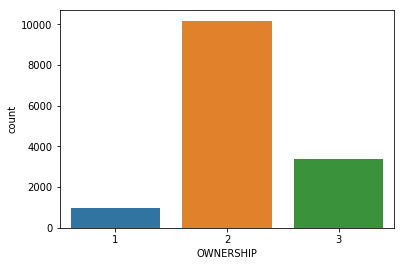

In [19]:
sns.countplot(x='OWNERSHIP', data=data_set)

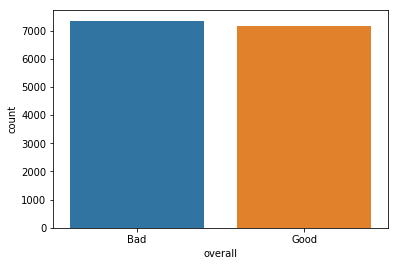

In [32]:
sns.countplot(x='overall', data=data_set)

In [451]:
data_set.dtypes

OWNERSHIP                       int64
BEDCERT                         int64
RESTOT                          int64
INHOSP                       category
exp_total                     float64
adj_total                     float64
TOT_PENLTY_CNT                  int64
WEIGHTED_ALL_CYCLES_SCORE      object
overall_rating                 object
overall                        object
dtype: object

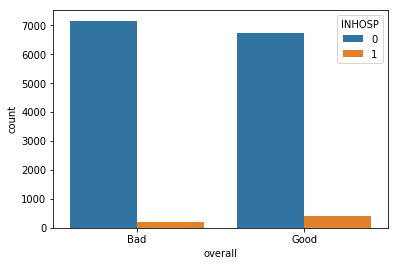

In [23]:
sns.countplot(x='overall', hue='INHOSP', data=data_set)

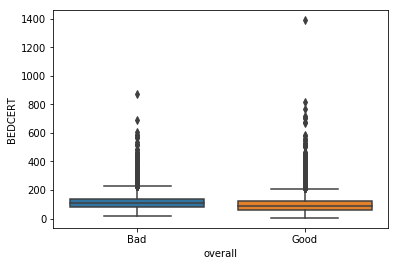

In [24]:
ax = sns.boxplot(x="overall", y="BEDCERT", data=data_set)

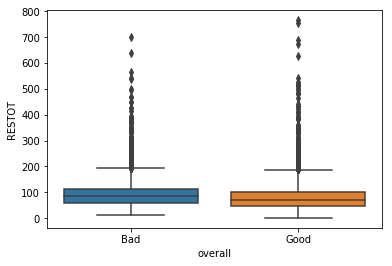

In [25]:
ax = sns.boxplot(x="overall", y="RESTOT", data=data_set)

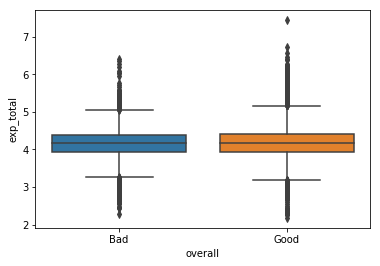

In [26]:
sns.boxplot(x="overall", y="exp_total", data=data_set)

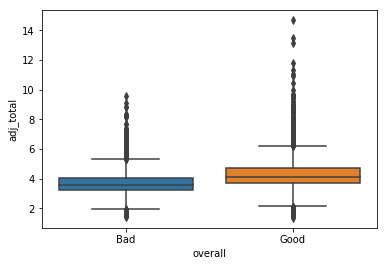

In [27]:
 sns.boxplot(x="overall", y="adj_total", data=data_set)

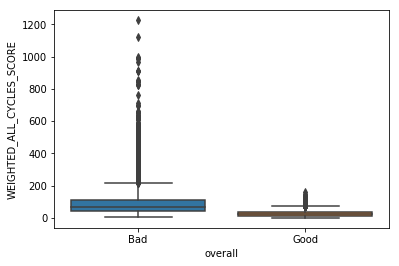

In [30]:
data_set["WEIGHTED_ALL_CYCLES_SCORE"] = data_set["WEIGHTED_ALL_CYCLES_SCORE"].astype('float')
sns.boxplot(x="overall", y="WEIGHTED_ALL_CYCLES_SCORE", data=data_set)

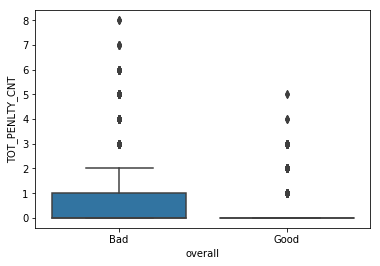

In [33]:

sns.boxplot(x="overall", y="TOT_PENLTY_CNT", data=data_set)

In [34]:
data_set.head()

data_set["overall"] = data_set["overall"].astype('category')
data_set["OWNERSHIP"] = data_set["OWNERSHIP"].astype('category')


In [35]:
data_set.dtypes

OWNERSHIP                    category
BEDCERT                         int64
RESTOT                          int64
INHOSP                       category
exp_total                     float64
adj_total                     float64
TOT_PENLTY_CNT                  int64
WEIGHTED_ALL_CYCLES_SCORE     float64
overall_rating                 object
overall                      category
dtype: object

In [36]:

data_set.dtypes

OWNERSHIP                    category
BEDCERT                         int64
RESTOT                          int64
INHOSP                       category
exp_total                     float64
adj_total                     float64
TOT_PENLTY_CNT                  int64
WEIGHTED_ALL_CYCLES_SCORE     float64
overall_rating                 object
overall                      category
dtype: object

In [37]:
data_set.head()
data_set.isna().sum()


OWNERSHIP                    0
BEDCERT                      0
RESTOT                       0
INHOSP                       0
exp_total                    0
adj_total                    0
TOT_PENLTY_CNT               0
WEIGHTED_ALL_CYCLES_SCORE    0
overall_rating               0
overall                      0
dtype: int64

In [38]:

X=data_set.drop(columns =["overall_rating", "overall"])
y=data_set["overall"]
X.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE
2,1,50,50,1,4.58152,3.86240,0,28.667
3,2,92,82,0,3.93527,4.89041,0,36.000
4,2,103,88,0,3.61362,3.77107,0,24.667
5,2,149,108,0,3.96384,4.26964,0,26.667
6,2,124,97,0,3.80750,3.58257,1,17.333


In [39]:
y.head()
X["OWNERSHIP"].dtype
X["INHOSP"].dtype


CategoricalDtype(categories=[0, 1], ordered=False)

In [458]:
data_set.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE,overall_rating,overall
2,1,50,50,1,4.58152,3.86240,0,28.667,3,Bad
3,2,92,82,0,3.93527,4.89041,0,36,2,Bad
4,2,103,88,0,3.61362,3.77107,0,24.667,3,Bad
5,2,149,108,0,3.96384,4.26964,0,26.667,5,Good
6,2,124,97,0,3.80750,3.58257,1,17.333,4,Good


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)

In [460]:
data_set.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE,overall_rating,overall
2,1,50,50,1,4.58152,3.86240,0,28.667,3,Bad
3,2,92,82,0,3.93527,4.89041,0,36,2,Bad
4,2,103,88,0,3.61362,3.77107,0,24.667,3,Bad
5,2,149,108,0,3.96384,4.26964,0,26.667,5,Good
6,2,124,97,0,3.80750,3.58257,1,17.333,4,Good


In [41]:
X_train.shape

(11610, 8)

In [42]:
X_test.shape

(2903, 8)

In [43]:
len(y_train)

11610

In [44]:
len(y_test)

2903

In [45]:
X_train.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE
5597,2,198,180,0,4.68638,3.23768,0,27.333
12045,2,100,96,0,4.00676,4.37464,0,1.333
11045,2,161,99,0,3.86261,3.84223,0,39.333
13282,2,180,132,0,4.18533,3.35189,0,173.000
12610,2,120,95,0,4.13938,3.23915,1,36.667


In [46]:
X_test.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE
13791,3,114,93,0,4.20395,3.84154,0,30.667
923,2,47,44,0,3.95507,3.65860,1,75.333
10297,2,162,66,0,3.86972,3.30014,2,183.167
5269,2,67,62,0,4.30516,3.41521,2,86.667
2013,2,120,112,0,3.84043,4.22979,1,76.667


In [467]:
y_train.head()

5597      Bad
12045    Good
11045    Good
13282     Bad
12610     Bad
Name: overall, dtype: category
Categories (2, object): [Bad, Good]

In [47]:
X_train.dtypes

OWNERSHIP                    category
BEDCERT                         int64
RESTOT                          int64
INHOSP                       category
exp_total                     float64
adj_total                     float64
TOT_PENLTY_CNT                  int64
WEIGHTED_ALL_CYCLES_SCORE     float64
dtype: object

In [321]:
##l1=["OWNERSHIP", "INHOSP"]
##for  i in l1:
    ##X_train[i]=X_train[i].astype('category')
    ##X_test[i]=X_test[i].astype('category')

In [322]:
X_train.dtypes



OWNERSHIP                    category
BEDCERT                         int64
RESTOT                          int64
INHOSP                       category
exp_total                     float64
adj_total                     float64
TOT_PENLTY_CNT                  int64
WEIGHTED_ALL_CYCLES_SCORE      object
dtype: object

In [48]:
X_train.isna().sum()

OWNERSHIP                    0
BEDCERT                      0
RESTOT                       0
INHOSP                       0
exp_total                    0
adj_total                    0
TOT_PENLTY_CNT               0
WEIGHTED_ALL_CYCLES_SCORE    0
dtype: int64

In [469]:
X_test.dtypes

OWNERSHIP                    category
BEDCERT                         int64
RESTOT                          int64
INHOSP                       category
exp_total                     float64
adj_total                     float64
TOT_PENLTY_CNT                  int64
WEIGHTED_ALL_CYCLES_SCORE      object
dtype: object

In [49]:

rm = LogisticRegression()
rm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict = rm.predict(X_test)
accuracy_score(y_test, y_predict)


0.8022735101619015

In [50]:
rm.predict_proba(X_test)

array([[3.08878143e-01, 6.91121857e-01],
       [8.94392908e-01, 1.05607092e-01],
       [9.99884854e-01, 1.15145926e-04],
       ...,
       [4.71145495e-01, 5.28854505e-01],
       [8.22928961e-04, 9.99177071e-01],
       [1.54857808e-01, 8.45142192e-01]])

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict, labels=["Good","Bad"])
print(confusion_matrix)


[[1198  222]
 [ 352 1131]]


In [52]:
cm1 = pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)
print("Confusion Matrix",cm1)

Confusion Matrix Predicted   Bad  Good   All
True                       
Bad        1131   352  1483
Good        222  1198  1420
All        1353  1550  2903


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        Bad       0.84      0.76      0.80      1483
       Good       0.77      0.84      0.81      1420

avg / total       0.81      0.80      0.80      2903



In [330]:
X_train.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE
5597,2,198,180,0,4.68638,3.23768,0,27.333
12045,2,100,96,0,4.00676,4.37464,0,1.333
11045,2,161,99,0,3.86261,3.84223,0,39.333
13282,2,180,132,0,4.18533,3.35189,0,173
12610,2,120,95,0,4.13938,3.23915,1,36.667


In [55]:
from sklearn.neighbors import KNeighborsClassifier
##neigh = KNeighborsClassifier(n_neighbors=3)
##neigh.fit(X_train, y_train)


In [476]:
##y_predict = neigh.predict(X_test)
##accuracy_score(y_test, y_predict)

In [54]:
from sklearn.grid_search import GridSearchCV

C:\Users\bhargavinagaraj\Anaconda_new\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\bhargavinagaraj\Anaconda_new\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [56]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [57]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [58]:
import sklearn
knn = sklearn.neighbors.KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')


In [59]:
from sklearn.preprocessing import scale

X_data =data_set.loc[:,]

In [60]:
X_data.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE,overall_rating,overall
2,1,50,50,1,4.58152,3.86240,0,28.667,3,Bad
3,2,92,82,0,3.93527,4.89041,0,36.000,2,Bad
4,2,103,88,0,3.61362,3.77107,0,24.667,3,Bad
5,2,149,108,0,3.96384,4.26964,0,26.667,5,Good
6,2,124,97,0,3.80750,3.58257,1,17.333,4,Good


In [61]:
X_data.isna().sum()

OWNERSHIP                    0
BEDCERT                      0
RESTOT                       0
INHOSP                       0
exp_total                    0
adj_total                    0
TOT_PENLTY_CNT               0
WEIGHTED_ALL_CYCLES_SCORE    0
overall_rating               0
overall                      0
dtype: int64

In [62]:
data_set.head()

,OWNERSHIP,BEDCERT,RESTOT,INHOSP,exp_total,adj_total,TOT_PENLTY_CNT,WEIGHTED_ALL_CYCLES_SCORE,overall_rating,overall
2,1,50,50,1,4.58152,3.86240,0,28.667,3,Bad
3,2,92,82,0,3.93527,4.89041,0,36.000,2,Bad
4,2,103,88,0,3.61362,3.77107,0,24.667,3,Bad
5,2,149,108,0,3.96384,4.26964,0,26.667,5,Good
6,2,124,97,0,3.80750,3.58257,1,17.333,4,Good


In [63]:
X_data=X_data.drop( columns ="overall_rating")
X_data =X_data.drop(columns ="overall")
X_data =X_data.drop(columns ="OWNERSHIP")
X_data =X_data.drop(columns ="INHOSP")

In [64]:
X_data.head()
Xs= scale(X_data)

In [65]:
Xs=pd.DataFrame(Xs)

In [66]:
Xs.head()

,0,1,2,3,4,5
0,-0.954424,-0.704205,0.994058,-0.143034,-0.517991,-0.424788
1,-0.258359,-0.099394,-0.594507,0.977261,-0.517991,-0.327962
2,-0.076057,0.014008,-1.385164,-0.242563,-0.517991,-0.477604
3,0.686300,0.392014,-0.524278,0.300764,-0.517991,-0.451196
4,0.271976,0.184110,-0.908582,-0.447985,0.583329,-0.574443


In [67]:
df1=pd.DataFrame(data_set.loc[:,"OWNERSHIP"])
df2=pd.DataFrame(data_set.loc[:,"INHOSP"])

In [68]:
df1 =df1.reset_index(drop=True)
df2=df2.reset_index(drop=True)

In [69]:
print(df1.head())

  OWNERSHIP
0         1
1         2
2         2
3         2
4         2


In [70]:
Xs["OWNERSHIP"]= df1.loc[:,]
Xs["INHOSP"]=df2.loc[:,]

In [71]:
Xs.head()

,0,1,2,3,4,5,OWNERSHIP,INHOSP
0,-0.954424,-0.704205,0.994058,-0.143034,-0.517991,-0.424788,1,1
1,-0.258359,-0.099394,-0.594507,0.977261,-0.517991,-0.327962,2,0
2,-0.076057,0.014008,-1.385164,-0.242563,-0.517991,-0.477604,2,0
3,0.686300,0.392014,-0.524278,0.300764,-0.517991,-0.451196,2,0
4,0.271976,0.184110,-0.908582,-0.447985,0.583329,-0.574443,2,0


In [72]:
df1.head()

,OWNERSHIP
0,1
1,2
2,2
3,2
4,2


In [500]:
Xs.isna().sum()

0            0
1            0
2            0
3            0
4            0
5            0
OWNERSHIP    0
INHOSP       0
dtype: int64

In [73]:



grid.fit(Xs, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [74]:
grid.grid_scores_

[mean: 0.72046, std: 0.02523, params: {'n_neighbors': 1},
 mean: 0.71660, std: 0.01419, params: {'n_neighbors': 2},
 mean: 0.75270, std: 0.02536, params: {'n_neighbors': 3},
 mean: 0.74926, std: 0.01645, params: {'n_neighbors': 4},
 mean: 0.75911, std: 0.02711, params: {'n_neighbors': 5},
 mean: 0.75856, std: 0.02418, params: {'n_neighbors': 6},
 mean: 0.76841, std: 0.02546, params: {'n_neighbors': 7},
 mean: 0.76552, std: 0.02258, params: {'n_neighbors': 8},
 mean: 0.77165, std: 0.02717, params: {'n_neighbors': 9},
 mean: 0.76883, std: 0.02543, params: {'n_neighbors': 10},
 mean: 0.77124, std: 0.03005, params: {'n_neighbors': 11},
 mean: 0.77110, std: 0.02491, params: {'n_neighbors': 12},
 mean: 0.77090, std: 0.03152, params: {'n_neighbors': 13},
 mean: 0.77069, std: 0.02620, params: {'n_neighbors': 14},
 mean: 0.77276, std: 0.03189, params: {'n_neighbors': 15},
 mean: 0.77462, std: 0.02829, params: {'n_neighbors': 16},
 mean: 0.77641, std: 0.03215, params: {'n_neighbors': 17},
 mean:

In [502]:
grid.grid_scores_[1]

mean: 0.71660, std: 0.01419, params: {'n_neighbors': 2}

In [75]:
grid.best_params_

{'n_neighbors': 17}

In [76]:
grid_mean_scores = [i.mean_validation_score for i in grid.grid_scores_]
print(grid_mean_scores)

[0.7204575208433818, 0.7165989113208847, 0.7527044718528216, 0.7492592847791635, 0.7591125198098256, 0.7585612898780404, 0.7684145249087025, 0.7655205677668298, 0.7716530007579412, 0.7688279473575416, 0.7712395783091022, 0.7711017708261558, 0.7708950596017363, 0.7706883483773169, 0.7727554606215118, 0.7746158616412872, 0.7764073589195893, 0.775856128987804, 0.7746158616412872, 0.7752359953145456, 0.7735134017777165, 0.7734444980362434, 0.7732377868118239, 0.7744091504168676, 0.7739957279680286, 0.7744091504168676, 0.7720664232067801, 0.7737890167436092, 0.7725487493970923, 0.7744780541583408]


In [77]:
print('CV Validation Score')
print(grid.grid_scores_[29].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[29].mean_validation_score)

CV Validation Score
[0.78871301 0.76997245 0.76085458 0.77325982 0.72984149 0.72777395
 0.76636802 0.7877326  0.80909717 0.83115093]

Mean Validation Score
0.7744780541583408


Text(0,0.5,'Cross-Validated Accuracy')

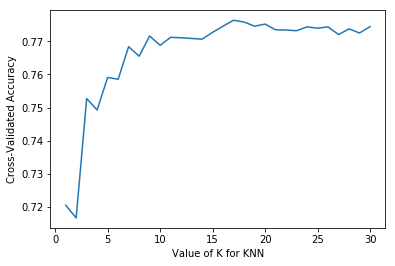

In [78]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')